In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from numpy import interp
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv', index_col=[0])
train.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


In [3]:
test = pd.read_csv('test.csv')
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A


### Análise exploratória;

In [4]:
train.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=166)

In [5]:
target = train['IN_TREINEIRO']

In [6]:
train.query('IN_TREINEIRO == 0')

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,305161d5bd5ba3ab0059debf906e875a3184996c,2016,3300100,Angra dos Reis,33,RJ,23,M,2.0,3,...,5.0,B,A,A,A,D,A,A,A,D
4582,aadf671ef8c1c6efa42e69432093ab83c17a52ac,2016,3502903,Araçoiaba da Serra,35,SP,20,M,0.0,1,...,NaN,A,A,A,A,A,A,A,A,A
4583,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,2016,2613800,São Vicente Ferrer,26,PE,33,F,0.0,3,...,NaN,A,A,B,B,A,A,A,A,A
4585,c7a9e94a42bd76b7978f13c013a61702e36cc42c,2016,3303203,Nilópolis,33,RJ,36,M,1.0,3,...,5.0,A,A,A,A,D,A,A,A,D


Quais são as caraceristics de um treineiro?

In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [8]:
df_corr_pearson = pd.DataFrame (train.corr(method ='pearson')['IN_TREINEIRO'])
df_corr_pearson.sort_values('IN_TREINEIRO', ascending=False)

,IN_TREINEIRO
IN_TREINEIRO,1.000000
TP_ST_CONCLUSAO,0.533983
TP_PRESENCA_CN,0.094692
TP_PRESENCA_CH,0.094692
TP_PRESENCA_MT,0.092454
TP_PRESENCA_LC,0.092454
Q034,0.055265
Q039,0.040348
Q005,0.033411
Q038,0.018855


Utilizei a correlação de Pearson para os atributos mais correlacionados com a variavel alvo.
Analisando a correlação optei pelos dois mais próximos de 1 e os dois mais próximos de -1.

<img src="pearson.PNG">

<AxesSubplot:>

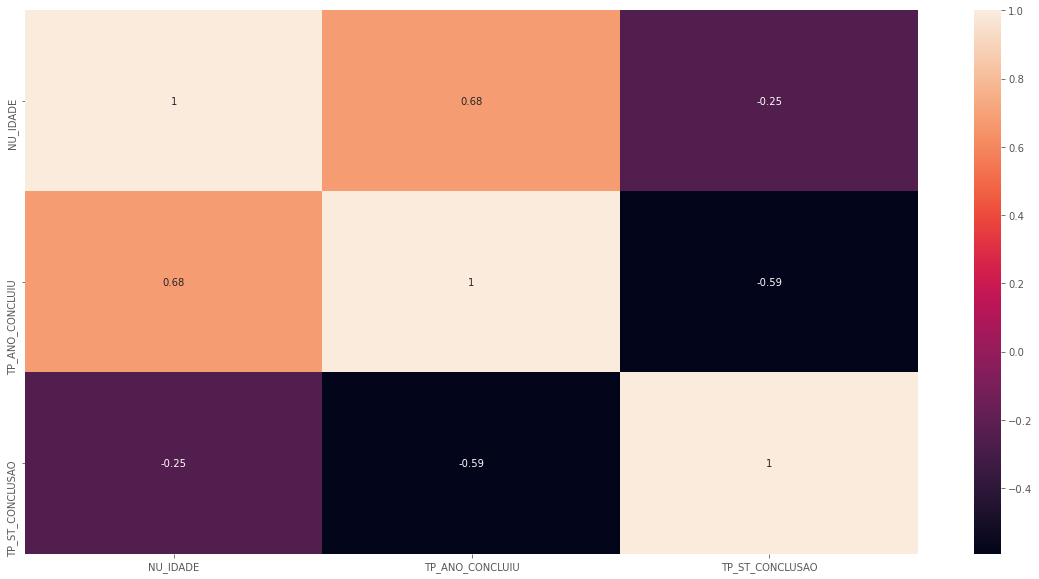

In [9]:
# Verificar correlações de features selecionadas:
plt.style.use('ggplot')

corr = train[['NU_IDADE','TP_ANO_CONCLUIU','TP_ST_CONCLUSAO']].corr()
ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

In [10]:
def dados_nulos(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valores Faltantes', 1 : '% do total'})
        return mis_val_table_ren_columns.round(2).sort_values('% do total', ascending=False)

dados_nulos(train)

,Valores Faltantes,% do total
SG_UF_ENTIDADE_CERTIFICACAO,12092,88.07
CO_UF_ENTIDADE_CERTIFICACAO,12092,88.07
NO_ENTIDADE_CERTIFICACAO,12092,88.07
Q041,10792,78.60
TP_SIT_FUNC_ESC,9448,68.81
TP_LOCALIZACAO_ESC,9448,68.81
TP_DEPENDENCIA_ADM_ESC,9448,68.81
SG_UF_ESC,9448,68.81
CO_UF_ESC,9448,68.81
NO_MUNICIPIO_ESC,9448,68.81


In [11]:
#os atributos correlacionados não tem dados nulos, ou faltantes por tanto não pe necessário tratamento

In [12]:
# colunas dos atributo
feature_cols      = train[['TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','NU_IDADE','TP_PRESENCA_CN']]
feature_cols_test = test[['TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','NU_IDADE','TP_PRESENCA_CN']]

# coluna-alvo, 'outcome'
target_col = train['IN_TREINEIRO']

                 importance
feature                    
TP_ST_CONCLUSAO       0.669
NU_IDADE              0.292
TP_ANO_CONCLUIU       0.031
TP_PRESENCA_CN        0.008


<AxesSubplot:xlabel='feature'>

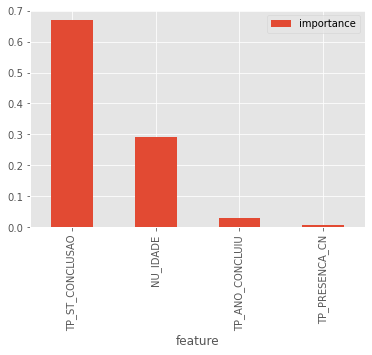

In [13]:
### Feature Importance
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=50,     #20
                              random_state=0)
forest.fit(feature_cols, target_col)

importances = pd.DataFrame({'feature':feature_cols.columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print (importances)
importances.plot.bar()

TP_ANO_CONCLUIU e TP_PRESENCA_CN, tem um pouco de correlação com a variavel target, porém não há tanta importancia para o modelo.

In [14]:

feature_cols      = train[['TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','NU_IDADE']]
feature_cols_test = test[['TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','NU_IDADE']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(feature_cols, target_col, test_size=0.50, random_state=42)

In [16]:
model_gnb = GaussianNB()
model_rf = RandomForestClassifier()
model_svm = SVC(kernel='linear',probability=True)

In [17]:
for model in [model_gnb,model_rf,model_svm]:
    print (model)
    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test)
    
    print ('ROC',(roc_auc_score(y_test, y_pred)))
    print ('F1 score:', f1_score(y_test, y_pred))
    print ('Precision:' ,precision_score(y_test, y_pred))
    
    print('----------------------------------------------')

GaussianNB(priors=None, var_smoothing=1e-09)
ROC 0.9847289813727135
F1 score: 0.9087261785356069
Precision: 0.8327205882352942
----------------------------------------------
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
ROC 0.990066225165563
F1 score: 0.9899665551839464
Precision: 1.0
----------------------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-

In [18]:
pred_test = model_rf.predict(feature_cols_test)
resposta = pd.DataFrame(test['NU_INSCRICAO'])
resposta['IN_TREINEIRO'] = pred_test

In [19]:
resposta

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0


In [20]:
resposta.to_csv('answer.csv', index = False)

O Primeiro resultado do desafio fopi de 99%, de qualquer forma vou aplicar um Grid Search para analisar os resultados.

In [21]:
param_grid = {
    'n_estimators': [2,10,50,500,1000],
    'bootstrap': [False, True],
    'max_depth':[2,4,8,10,100]
}

rf_grd = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, n_jobs=-1)
rf_grd.fit(X_train, y_train)

print(rf_grd.score(X_train, y_train))
print(rf_grd.best_params_)

0.9966496722505462
{'bootstrap': False, 'max_depth': 4, 'n_estimators': 2}


In [22]:
pred_test = rf_grd.predict(feature_cols_test)
resposta = pd.DataFrame(test['NU_INSCRICAO'])
resposta['IN_TREINEIRO'] = pred_test
resposta.to_csv('answer.csv', index = False)

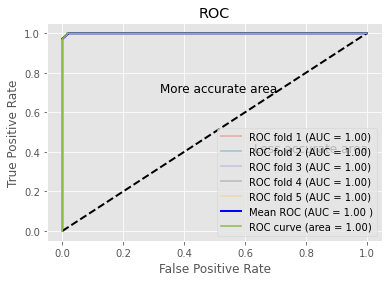

ROC CURVE score - 0.9997243859530189

-----------------------------------------------------------------------------------------------



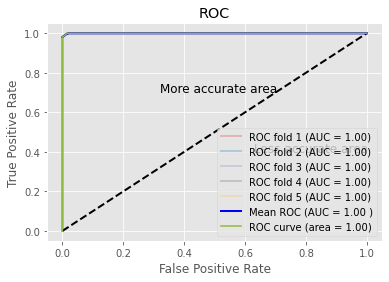

ROC CURVE score - 0.9998416330576821

-----------------------------------------------------------------------------------------------



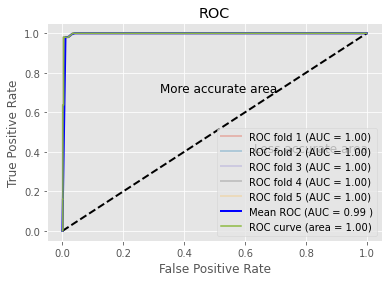

ROC CURVE score - 0.9970732677712715

-----------------------------------------------------------------------------------------------



In [23]:
# numero de splits para cross validation
cv = StratifiedKFold(n_splits=5,shuffle=False)

# svm ficou muito lento

for model in [model_gnb,model_rf,model_svm]:
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 1
    
    for train,test in cv.split(X_train,y_train):
        prediction = model.fit(X_train,y_train).predict_proba(X_test)
        fpr, tpr, t = roc_curve(y_test, prediction[:, 1])
        y_scores = model.predict_proba(X_test)[:,1]
        
        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i= i+1

    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='blue',
             label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
    
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.text(0.32,0.7,'More accurate area',fontsize = 12)
    plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
    plt.show()

  
    #############################################################
    print("ROC CURVE score - %s" % roc_auc_score(y_test, y_scores))
            
    print ("\n-----------------------------------------------------------------------------------------------\n")

GaussianNB(priors=None, var_smoothing=1e-09)_modelo
Confusion matrix, without normalization
[[5777  182]
 [   0  906]]
Normalized confusion matrix
[[0.97 0.03]
 [0.   1.  ]]


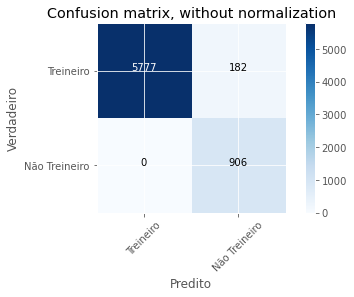

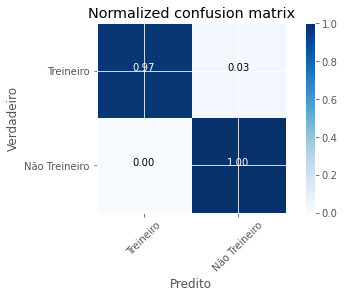

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)_modelo
Confusion matrix, without normalization
[[5959    0]
 [  18  888]]
Normalized confusion matrix
[[1.   0.  ]
 [0.02 0.98]]


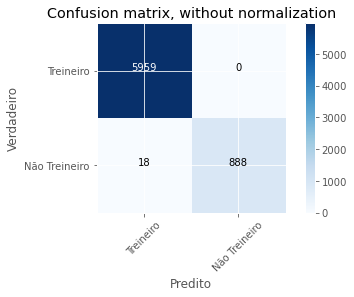

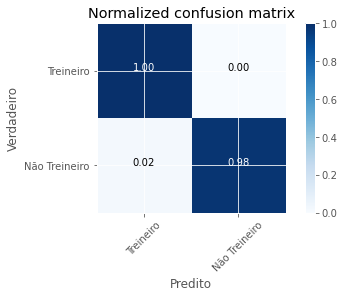

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)_modelo
Confusion matrix, without normalization
[[5911   48]
 [  18  888]]
Normalized confusion matrix
[[0.99 0.01]
 [0.02 0.98]]


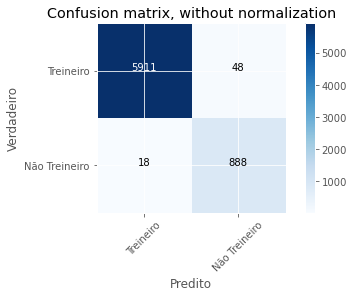

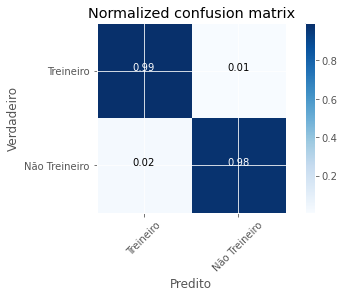

In [24]:
import itertools  
from sklearn.metrics import confusion_matrix

class_names = ['Treineiro', 'Não Treineiro']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')

for model in [model_gnb,model_rf,model_svm]:

    y_pred = model.predict(X_test)    
    
    print(str(model)+'_modelo')
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()